In [2]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd

from bin import utils

# Propose

**Distribution**

Since we already find interesting perturbation in single cell screen, we then tend to double check them in spatial data, see if any T subtype correlates with the guide distribution spatially.

![sankey.png](./cache/sankey.png)

Compared to *sgNon-targeting*, we speculate that <u>sgYbx1, sgBatf, Cxcr4, sgBhlhe40</u> exhibits more stem-like pheonotype, and that perturbation with <u>sgCd74, sgBatf, sgCcr4, sgAckr8, Ccr7, sgTox, sgFoxp1</u> promotes effector pheonotype, while ko of <u>sgBcl2l11, sgCcr5</u> exhibits more exhausted pheonotype.

Marker correlation analysis reveals guide "distance" with Non-targeting.

![image.png](./cache/edistance.png)

By observing the difference of transcriptomic heterogenity, we found high effect perturbation: <u>Cd74, sgBatf, sgYbx1, sgCcr2, sgCxcr3, sgElab, sgCxcr6</u>

![spatial.png](./cache/spatialClusterProportion.png)

Spatially, <u>sgCd74, sgGpr35</u> perturbed T localized more in *cluster 6*, a cluster of HA uptake and ECM reformation. While guide <u>sgBhlhe40, sgCxcr3, sgCcr5, sgCxcr2, sgCxcr6, sgCcr4, sgDdit4, sgCcr1, sgHopx, sgCcr7</u> enriched in *cluster 5*, which defined as myofibril. *Cluster 3*, stiff Fibroblasts, enriched more <u>sgKlf2, sgYbx1, sgAckr3, sgBcl2</u> and *cluster 10*, APC metabolism, enriched more <u>Bcl21l1</u> ko T.

High Quality (Perturbation with high correlation between two guides) are: <u>sgCxcr5, sgYbx1, sgBcl2, sgDdit4, sgCcr7, sgCcr1, sgHpox, sgBcl2l11, sgCxcr4, sgAckr3, sgBhlhe40, sgCcr5</u>

Spatially we've seen under T subtype, correlation of ntc guide (reflecting the abundance of *wt* T cells) and perturbation guide (reflecting the abundance of perturbed T cells) and exclusive signatures.

Top exclusive pairs with reversed correlation are:

1. <u>Batf</u>: Ssh2, Sell, Ccr7, Il7r, Hmgn1
2. <u>Bhlhe40</u>: Hmgn1, Add3, Il7r, Sell
3. <u>Hopx</u>: Trir, Ssh2, Nop56, Ankrd11, Srsf6, Il7r, Tcf7, Sell
4. <u>Klf2</u>: Il2rb, Ptprcap, Klrk1, Tox, Fasl
5. <u>Ddit4</u>: Emb, Hmgn1, Sell
6. <u>Bcl2l11</u>: Hmgn1, Itgb7, Sell
7. <u>Elob</u>: Flot1, Jund, Lypla1
8. <u>Ccr7</u>: Bst2, Itgal, Slamf7, Zbp1, Rgs1, Ctsc, Tox, Klrd1
9. <u>Tgif1</u>: Ybx1, Ccl5, Arf6, Jund
10. <u>Foxp1</u>: Fasl, Tox, Batf, Lgals1
11. <u>Tox</u>: Emb, Hmgn1, Fos, Ssh2, Arl4c, Sell, Il7r
12. <u>Bcl2</u>: Batf, Mrps36, Anxa2
13. <u>Jund</u>: Laptm5, Grap2
14. <u>Jun</u>: Plekha2, Il2rb, Jak3, Rab5c, Slamf7, Ptprcap
15. <u>Fos</u>: Ywhah, Anxa5, Batf, Fkbp1a, Fasl, Ptprcap
16. <u>Cxcr6</u>: Add3, Il7r
17. <u>Ybx1</u>: Sell, Ssh2, Trbc2, Trac
18. <u>Cxcr3</u>: Selenow, Jak3, Sell, Il7r

Spatial raw subtyping reveals T marker proportion.

# Spatial correlation with T marker

In [3]:
adata_mod = sc.read_h5ad('./cache/mapping.mod.h5')

In [5]:
adata_mod.obs

marker  annotations  _indices  _scvi_batch  _scvi_labels  \
125026       A  Macrophages         0            0             0   
186976       A       Others         1            0             0   
282318       A   Fibroblast         2            0             0   
259297       A    Malignant         3            0             0   
66193        A   Fibroblast         4            0             0   
...        ...          ...       ...          ...           ...   
96209        B       Others    278117            1             0   
77803-1      B       Others    278118            1             0   
89710        B       Others    278119            1             0   
85745        B       Others    278120            1             0   
87223        B       Others    278121            1             0   

         Central Memory Cd8+ T  Effector Cd8+ T  Effector Memory Cd8+ T  \
125026                0.036775         0.062952                0.027992   
186976                0.014529         0.017254                0.011013   
282318                0.023266         0.088041                0.016511   
259297                0.100189         0.150325                0.248420   
66193                 0.070339         0.061301                0.069232   
...                        ...              ...                     ...   
96209                 0.013559         0.018234                0.010626   
77803-1               0.017241         0.020068                0.011011   
89710                 0.018244         0.019465                0.012166   
85745                 0.014029         0.016061                0.009015   
87223                 0.013155         0.019211                0.008138   

         Exhausted Cd8+ T  Exhausted Memory Cd8+ T  Poliferating Cd8+ T  \
125026           0.044973                 0.079702             0.006380   
186976           0.011961                 0.012622             0.004839   
282318           0.020110                 0.124636             0.030971   
259297           0.090228                 0.128478             0.093564   
66193            0.044022                 0.087482             0.151893   
...                   ...                      ...                  ...   
96209            0.016901                 0.017174             0.004722   
77803-1          0.013118                 0.015586             0.004835   
89710            0.013536                 0.018374             0.004229   
85745            0.012943                 0.010755             0.005214   
87223            0.014570                 0.023250             0.003717   

         Stem-like Cd8+ T  
125026           0.091974  
186976           0.022395  
282318           0.056743  
259297           0.137010  
66193            0.081225  
...                   ...  
96209            0.017857  
77803-1          0.020031  
89710            0.018141  
85745            0.024298  
87223            0.021902  

[278122 rows x 12 columns]

In [7]:
import matplotlib.pyplot as plt

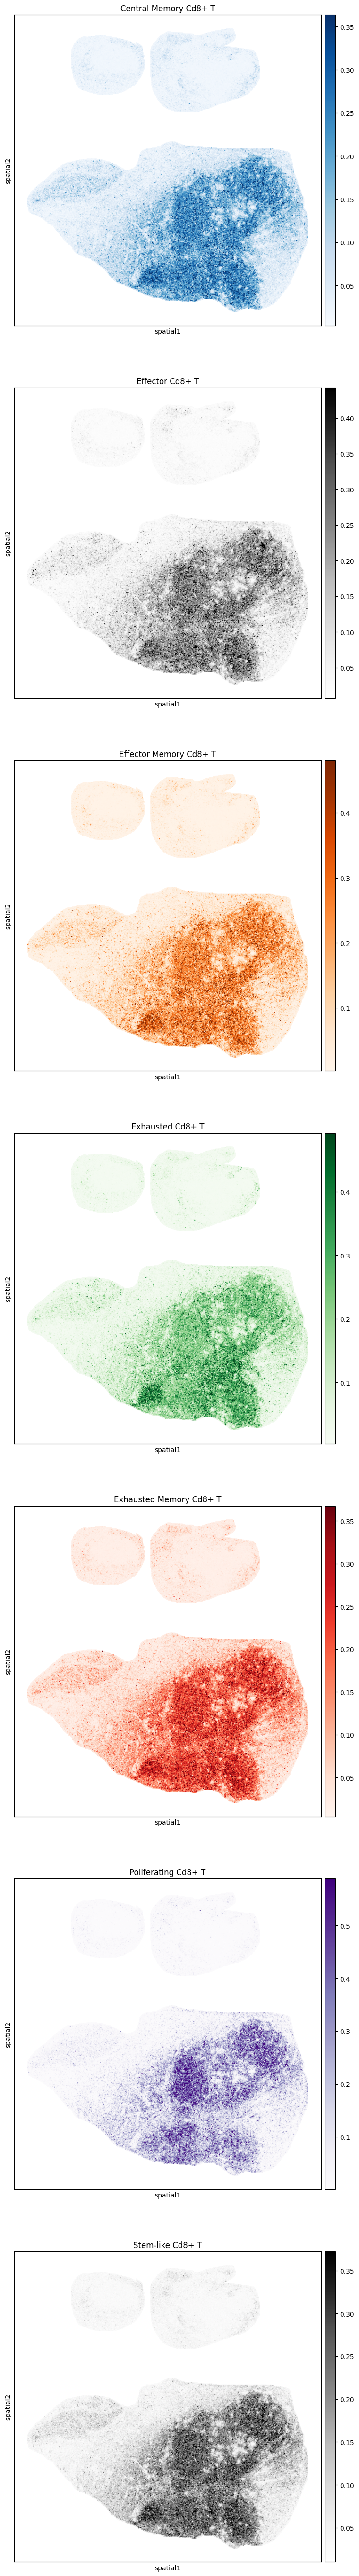

In [17]:
adata_mod_ = adata_mod[adata_mod.obs["marker"] == 'A']
fig, ax = plt.subplots(7, 1, figsize=(10, 70))
cmaps = ['Blues', "Greys", 'Oranges', 'Greens', "Reds", "Purples", 'Greys']
for idx, obs_name in enumerate(adata_mod.obs.columns[-7:]):
    sq.pl.spatial_scatter(adata_mod_, vmax=np.quantile(adata_mod_.obs[obs_name], 0.99), cmap=cmaps[idx], color=obs_name, shape=None, size=2, library_id='spatial', ax=ax[idx])

In [48]:
adata_mod_.obs

marker  annotations  _indices  _scvi_batch  _scvi_labels  \
125026      A  Macrophages         0            0             0   
186976      A       Others         1            0             0   
282318      A   Fibroblast         2            0             0   
259297      A    Malignant         3            0             0   
66193       A   Fibroblast         4            0             0   
...       ...          ...       ...          ...           ...   
83393       A       Others    176589            0             0   
217389      A       Others    176590            0             0   
205008      A       Others    176591            0             0   
214017      A       Others    176592            0             0   
108175      A       Others    176593            0             0   

        Central Memory Cd8+ T  Effector Cd8+ T  Effector Memory Cd8+ T  \
125026               0.036775         0.062952                0.027992   
186976               0.014529         0.017254                0.011013   
282318               0.023266         0.088041                0.016511   
259297               0.100189         0.150325                0.248420   
66193                0.070339         0.061301                0.069232   
...                       ...              ...                     ...   
83393                0.012241         0.013165                0.011943   
217389               0.016757         0.018679                0.012094   
205008               0.014555         0.022124                0.010352   
214017               0.018513         0.014871                0.008541   
108175               0.012969         0.015637                0.015916   

        Exhausted Cd8+ T  Exhausted Memory Cd8+ T  Poliferating Cd8+ T  \
125026          0.044973                 0.079702             0.006380   
186976          0.011961                 0.012622             0.004839   
282318          0.020110                 0.124636             0.030971   
259297          0.090228                 0.128478             0.093564   
66193           0.044022                 0.087482             0.151893   
...                  ...                      ...                  ...   
83393           0.011120                 0.015027             0.004070   
217389          0.015822                 0.017767             0.005350   
205008          0.012519                 0.016108             0.005649   
214017          0.014618                 0.017599             0.005231   
108175          0.014137                 0.014881             0.004345   

        Stem-like Cd8+ T                   t_type  
125026          0.091974         Stem-like Cd8+ T  
186976          0.022395         Stem-like Cd8+ T  
282318          0.056743  Exhausted Memory Cd8+ T  
259297          0.137010   Effector Memory Cd8+ T  
66193           0.081225      Poliferating Cd8+ T  
...                  ...                      ...  
83393           0.021176         Stem-like Cd8+ T  
217389          0.036600         Stem-like Cd8+ T  
205008          0.026984         Stem-like Cd8+ T  
214017          0.028073         Stem-like Cd8+ T  
108175          0.027316         Stem-like Cd8+ T  

[176594 rows x 13 columns]

In [86]:
name_dict = pd.DataFrame(adata_mod.obs.columns[-8:-1]).to_dict()[0]
adata_mod_.obs["t_type"] = pd.DataFrame(np.array(adata_mod_.obs.iloc[:, -8:-1]).argmax(axis=1))[0].map(name_dict).tolist()
adata_mod_.obs['t_type'][adata_mod_.obs.iloc[:, -8:-1].max(axis=1) < adata_mod_.obs.iloc[:, -8:-1].quantile(0.99).min()] = 'Unknown T'

/tmp/ipykernel_61163/1232367310.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata_mod_.obs['t_type'][adata_mod_.obs.iloc[:, -8:-1].max(axis=1) < adata_mod_.obs.iloc[:, -8:-1].quantile(0.99).min()] = 'Unknown T'
/tmp/ipykernel_61163/1

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Unknown T'),
  Text(1, 0, 'Effector Memory Cd8+ T'),
  Text(2, 0, 'Exhausted Memory Cd8+ T'),
  Text(3, 0, 'Central Memory Cd8+ T'),
  Text(4, 0, 'Effector Cd8+ T'),
  Text(5, 0, 'Exhausted Cd8+ T'),
  Text(6, 0, '_scvi_labels'),
  Text(7, 0, 'Poliferating Cd8+ T')])

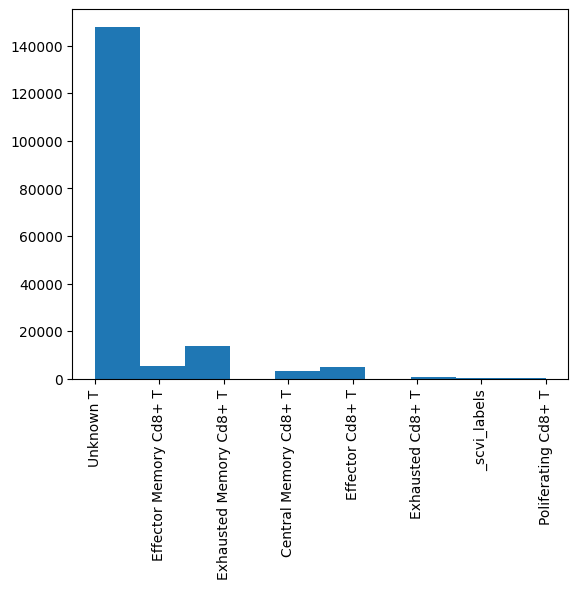

In [87]:
plt.hist(adata_mod_.obs["t_type"])
plt.xticks(rotation=90)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


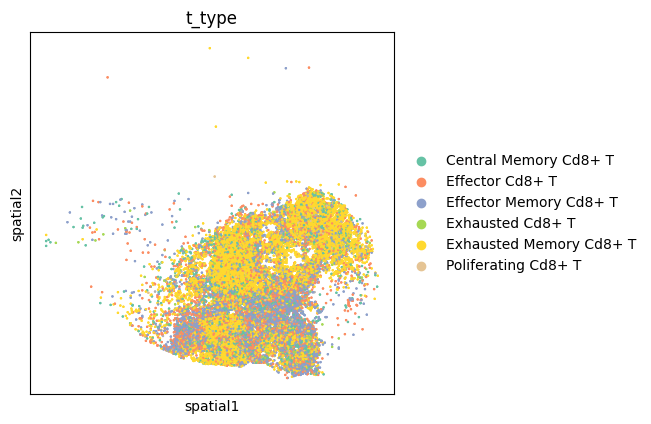

In [88]:
sq.pl.spatial_scatter(adata_mod_[~adata_mod_.obs["t_type"].str.startswith("Unknown")], palette='Set2', color="t_type", shape=None, size=2, library_id='spatial')

In [99]:
fdata_.obs["spatial_cov"] = [str(array[0] // 100 * 100) + "_" + str(array[1] // 100 * 100) for array in fdata_.obsm["spatial"]]

In [101]:
adata_mod_.obs["spatial_cov"] = [str(array[0] // 100 * 100) + "_" + str(array[1] // 100 * 100) for array in adata_mod_.obsm["spatial"]]

In [102]:
cluster_dict = fdata_.obs[["spatial_cov", "cluster"]].set_index("spatial_cov").to_dict()["cluster"]

In [107]:
adata_mod_.obs["cluster"] = adata_mod_.obs["spatial_cov"].map(cluster_dict).tolist()

In [129]:
p_df = adata_mod_.obs[["cluster", "t_type"]].dropna()
p_df = p_df[p_df["t_type"] != "Unknown T"]
p_df = p_df.groupby("cluster").value_counts().unstack().fillna(0)
p_df.index = [i for i in range(11)]

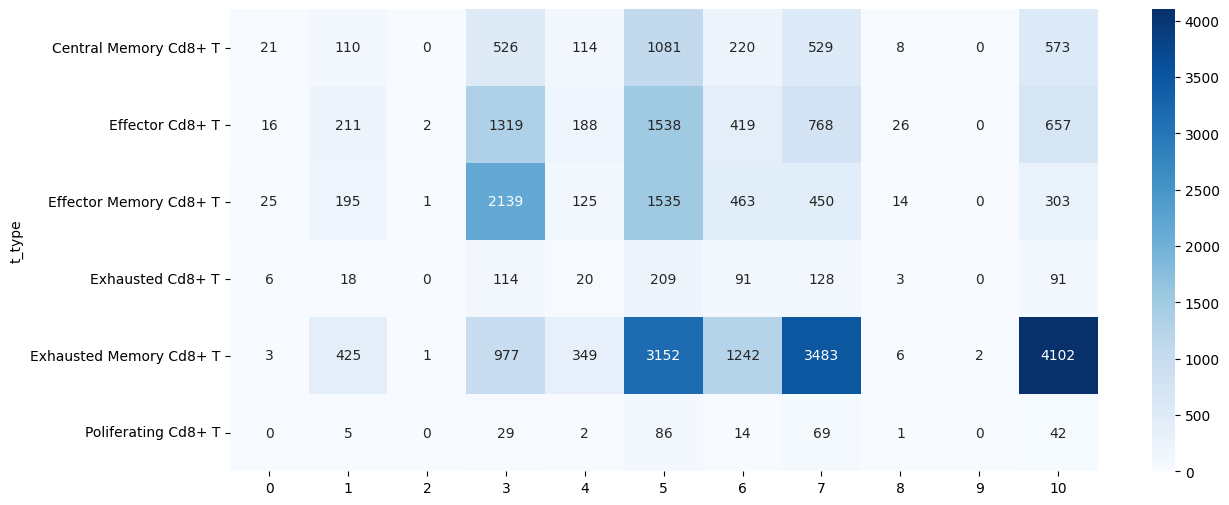

In [134]:
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.heatmap(p_df.T[:-1], annot=True, fmt='.0f', cmap='Blues')
plt.show()

In [217]:
gdata = sc.read_h5ad('./RNA/spatial.combined.bin100.h5')
gdata = gdata[:, gdata.var_names.str.startswith('sg')].copy()
gdata = utils.combine_guide_replicates(gdata)

/home/wpy/stereoseq/20240702-Exclusive/bin/utils.py:78: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [182]:
gdata.layers["clones"] = gdata.X

In [183]:
gdata.layers["clones"][gdata.X < np.quantile(gdata.X, 0.996)] = 0
gdata.layers["clones"][gdata.X >= np.quantile(gdata.X, 0.996)] = 1

In [184]:
gdata_ = gdata[gdata.obs["marker"] == "A"]

In [185]:
vec_dict = {}
for guide in gdata_.var_names:
    vec_dict[guide] = utils.extract_small_bin(adata_mod_, gdata_[gdata_[:, guide].layers["clones"] > 0]).obs["t_type"].value_counts()

/home/wpy/stereoseq/20240702-Exclusive/bin/utils.py:305: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bin100_masked_data.obs["spatial_cov"] = ['_'.join(map(str, [array[0] // bin_size * bin_size, array[1] // bin_size * bin_size])) for array in bin100_masked_data.obsm["spatial"]]
/home/wpy/stereoseq/20240702-Exclusive/bin/utils.py:305: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bin100_masked_data.obs["spatial_cov"] = ['_'.join(map(str, [array[0] // bin_size * bin_size, array[1] // bin_size * bin_size])) for array in bin100_masked_data.obsm["spatial"]]
/home/wpy/stereoseq/20240702-Exclusive/bin/utils.py:305: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bin100_masked_data.obs["spatial_cov"] = ['_'.join(map(str, [array[0] // bin_size * bin_size, array[1] // bin_size * bin_size])) for array in bin100_masked_data.obsm["

In [186]:
c_df = pd.concat(vec_dict.values(), axis=1)
c_df.columns = gdata_.var_names

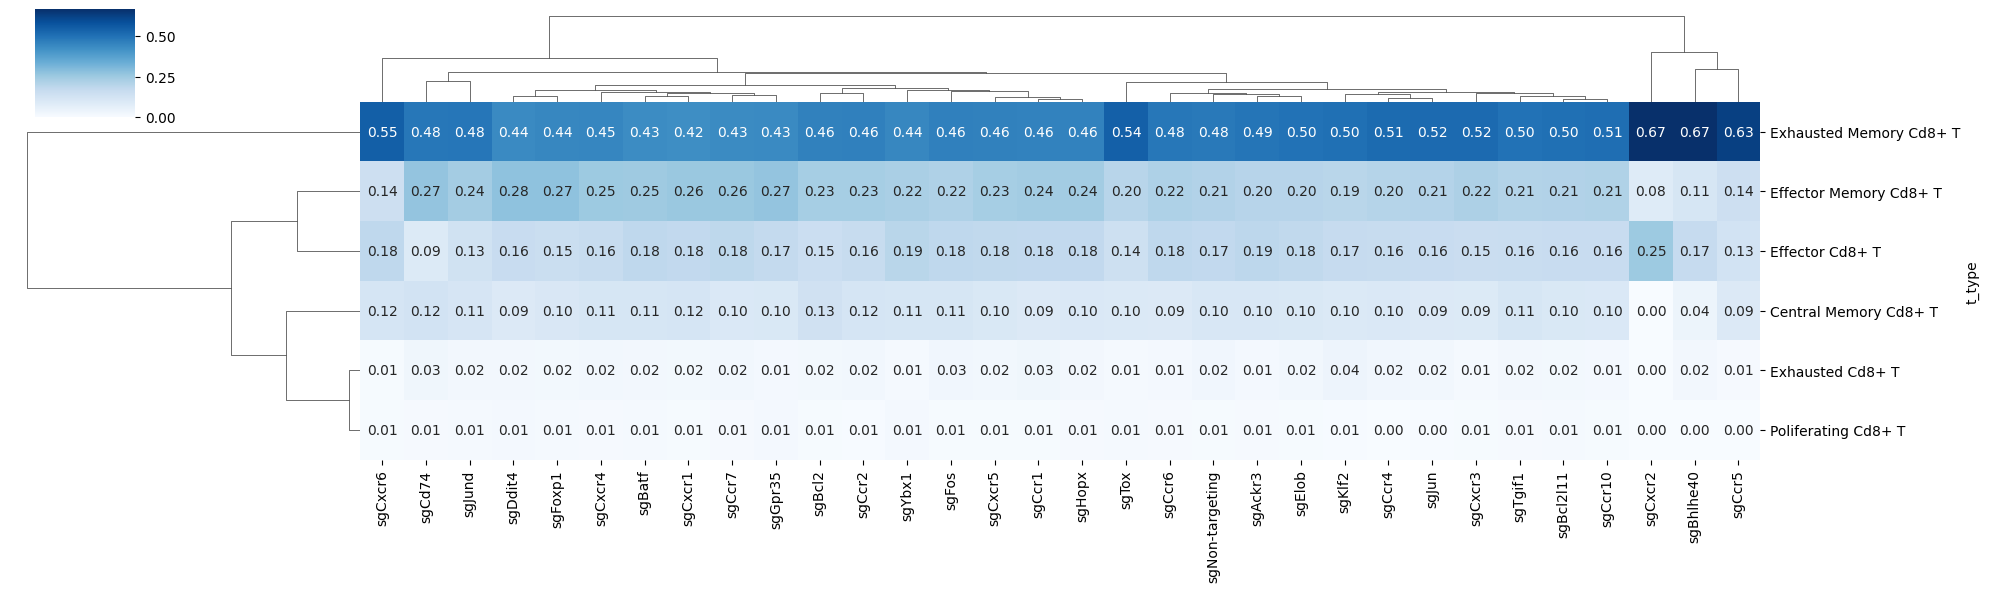

In [202]:
p_df = c_df.fillna(0).iloc[[1, 2, 3, 4, 6, 7], :]
p_df = p_df.div(p_df.sum(axis=0))
#plt.figure(figsize=(20, 6))
sns.clustermap(p_df, annot=True, fmt='.2f', cmap="Blues", figsize=(20, 6))
plt.show()

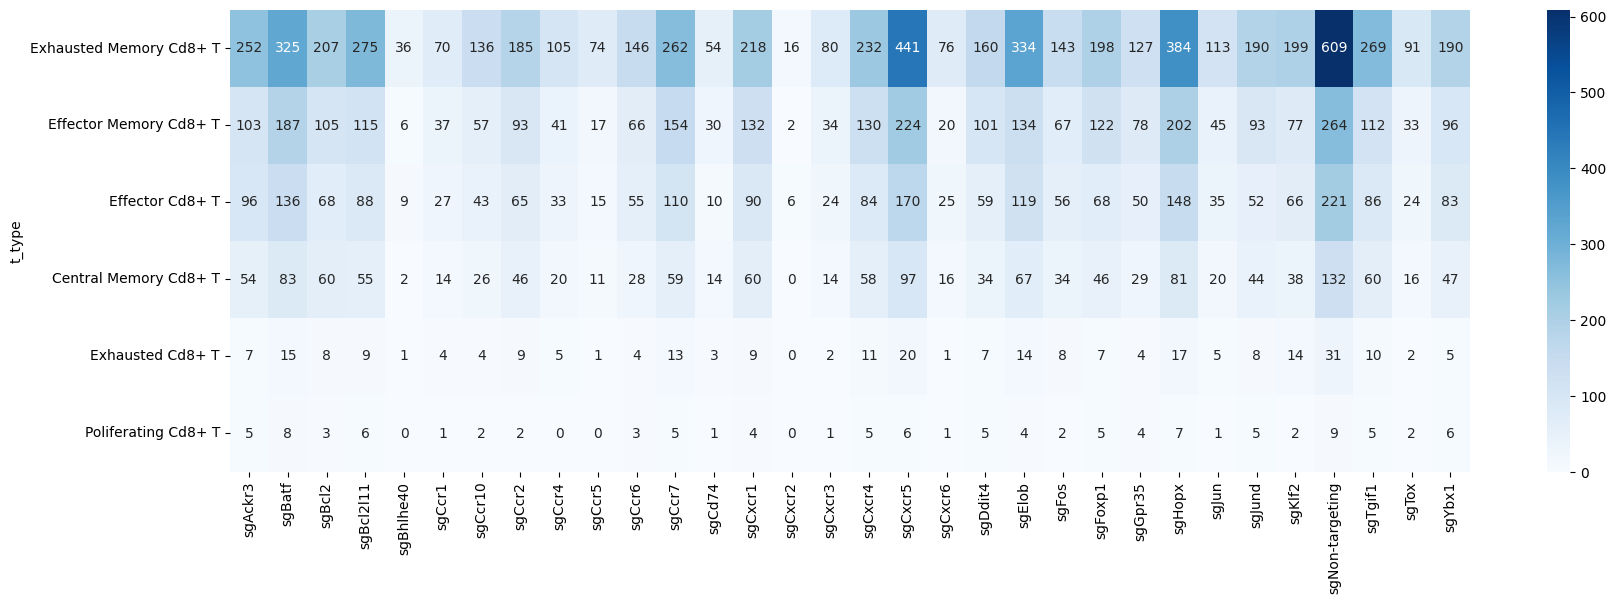

In [194]:
plt.figure(figsize=(20, 6))
sns.heatmap(, annot=True, fmt='.0f', cmap="Blues")
plt.show()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


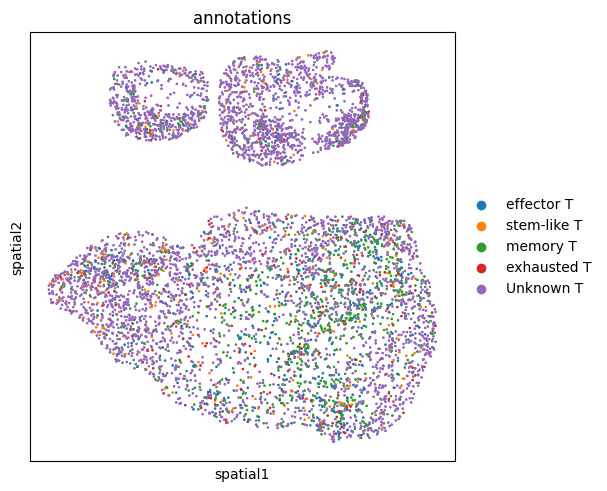

In [15]:
sq.pl.spatial_scatter(adata_mod_[adata_mod_.obs["annotations"].str.endswith("T")], color="annotations", shape=None, size=2, library_id='spatial')

In [74]:
fdata = sc.read_h5ad("./RNA/spatial.combined.clustered.h5")
fdata_ = fdata[fdata.obs["marker"] == 'A'].copy()

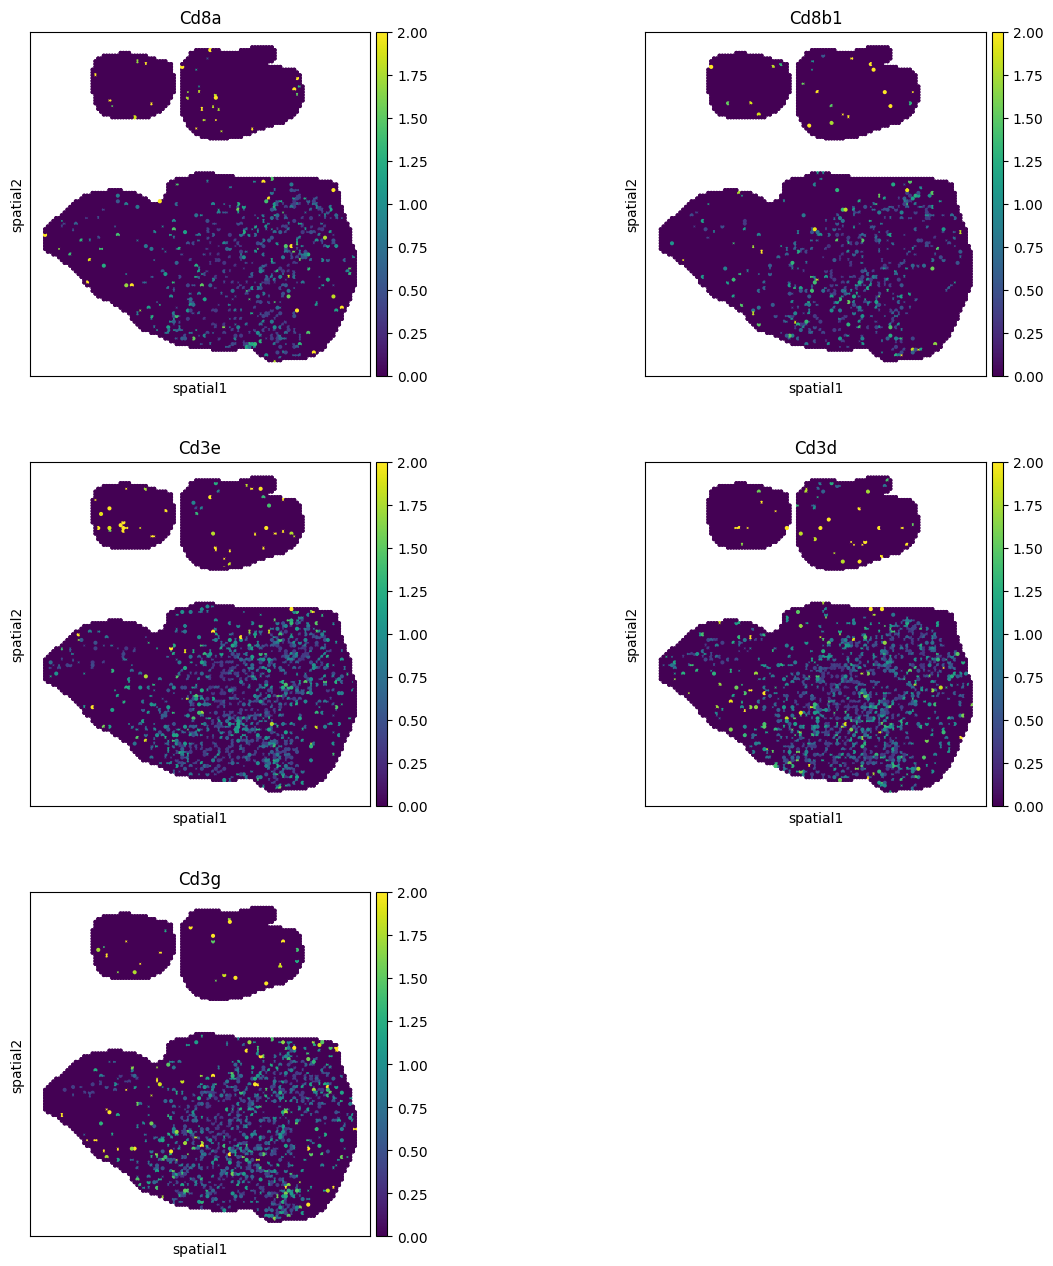

In [82]:
sq.pl.spatial_scatter(fdata_, color=["Cd8a", "Cd8b1", "Cd3e", "Cd3d", "Cd3g"], vmax=2, shape=None, size=15, library_id='spatial', ncols=2)

In [1]:
# Spatially, we observed different spatial correltation with NTC.

In [215]:
n_gdata = gdata.copy()
n_gdata.X = gdata.X * 10

/tmp/ipykernel_61163/3378839444.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("jet")
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


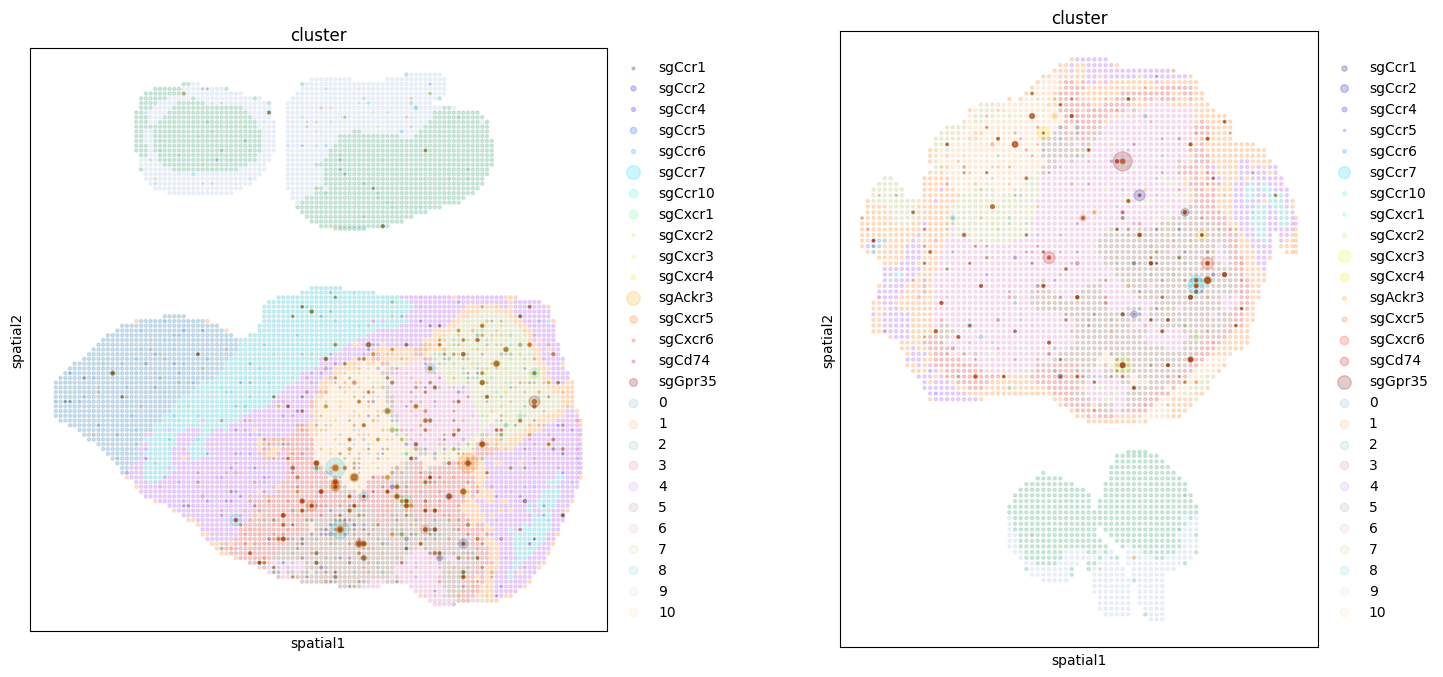

In [220]:
chemo_rec = ["sgCcr1", "sgCcr2", "sgCcr4", "sgCcr5", "sgCcr6", "sgCcr7",
    "sgCcr10", "sgCxcr1", "sgCxcr2", "sgCxcr3", "sgCxcr4", "sgAckr3",
    "sgCxcr5", "sgCxcr6", "sgCd74", "sgGpr35"]
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
import matplotlib.cm as cm
colormap = cm.get_cmap("jet")
colors = colormap(np.linspace(0, 1, len(chemo_rec)))
for idx, guide in enumerate(chemo_rec):
    utils.plot_dot(gdata[gdata.obs.marker == 'A'], gene_name=guide, ax=ax[0], color=colors[idx], square=False)
    utils.plot_dot(gdata[gdata.obs.marker == 'B'], gene_name=guide, ax=ax[1], color=colors[idx], square=False)
sq.pl.spatial_scatter(
    fdata,
    color=['cluster'],
    library_key='marker',  
    size=20,
    spatial_key='spatial',
    cmap='Set2',
    shape=None,
    ax=ax,
    fig=fig,
    alpha=0.1
)

In [221]:
T_markers = {
    'memory T': ['Il7r', 'Cd27', 'Timp1', 'Cd25'],
    'central memory T': ['Ccr7', 'Sell'],
    'effector T': ['Gzmk', 'Gzma', 'Gzmb', 'Prf1', 'Gnly'],
    'exhausted T': ['Havcr2', 'Lag3', 'Pdcd1', 'Entpd1', 'Tigit', 'Ctla4', 'Layn'],
    'stem-like T': ['Tcf7', 'Foxp1']
}

In [225]:
for marker in T_markers:
    sc.tl.score_genes(fdata, gene_list=T_markers[marker], score_name=f'{marker}_score')

In [228]:
fdata, gdata = utils.align_rna_guide_data(fdata, gdata)

In [238]:
from scipy.stats import spearmanr
from scipy.stats import f_oneway

In [239]:
corr_matrix = np.zeros((len(gdata.var_names), fdata.obs.columns.str.endswith('score').sum()))
for i, guide in enumerate(gdata.var_names):
    for j, score in enumerate(fdata.obs.columns[fdata.obs.columns.str.endswith('score')]):
        corr_matrix[i, j] = spearmanr(gdata[:, guide].X.toarray().flatten(), fdata.obs[score])[0]

In [242]:
c_df = pd.DataFrame(corr_matrix, columns=fdata.obs.columns[fdata.obs.columns.str.endswith('score')], index=gdata.var_names)

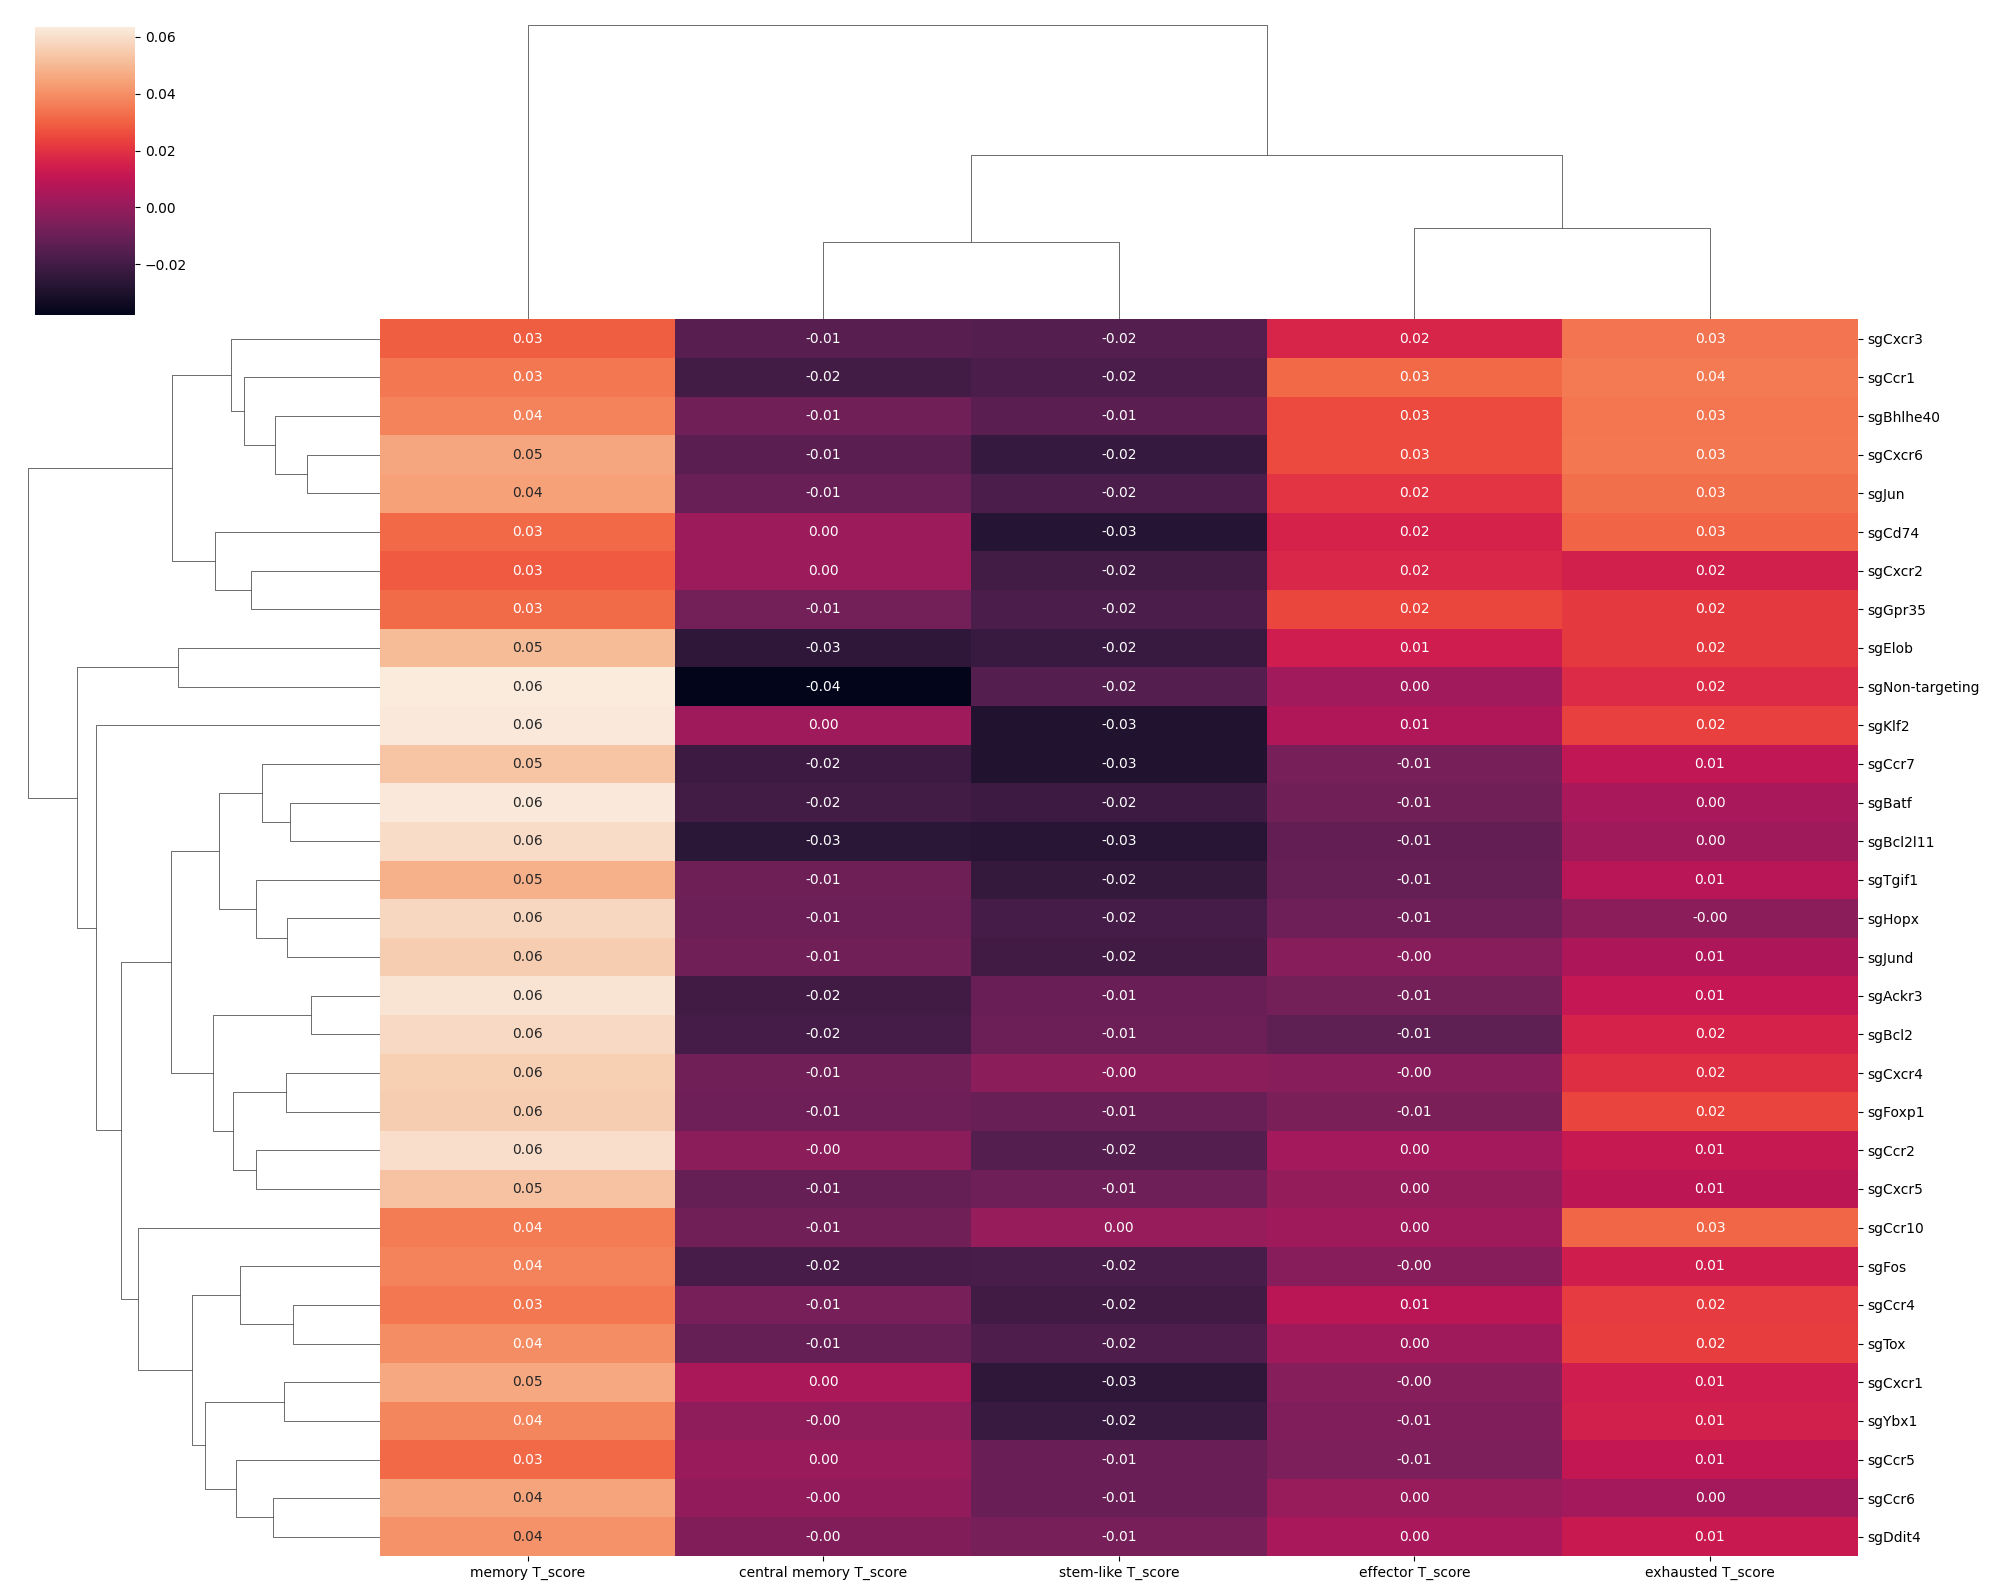

In [245]:
sns.clustermap(c_df, figsize=(20, 16), annot=True, fmt='.2f')

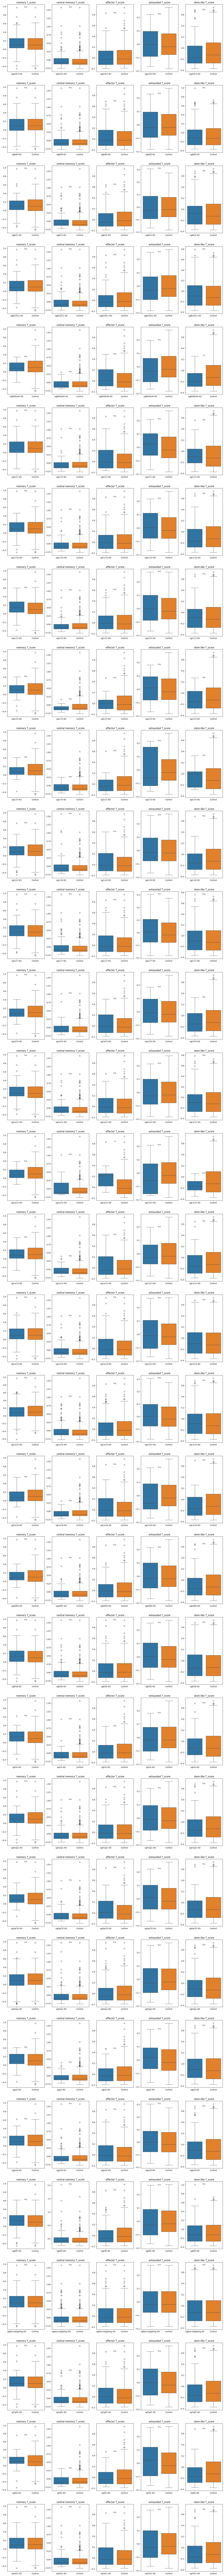

In [256]:
ntc_bin = fdata[gdata[:, 'sgNon-targeting'].X > 3]
names = fdata.obs.columns[fdata.obs.columns.str.endswith('score')]
fig, axs = plt.subplots(32, 5, figsize=(20, 240))
for i, guide in enumerate(gdata.var_names):
    major_bin = fdata[gdata[:, guide].X > 3]
    for j, name in enumerate(names):
        ax = axs[i, j]
        sns.boxplot([major_bin.obs[name].tolist(), ntc_bin.obs[name].tolist()], ax=ax)
        
        p = f_oneway(major_bin.obs[name].tolist(), ntc_bin.obs[name].tolist())[1]
        p = int(p * 100) * 0.01 if not np.isnan(p) else np.inf
        p = '**' if p < 0.1 else 'n.s.'

        ax.text(0.5, max(major_bin.obs[name].tolist()), p, ha='center')
        ax.set_xticks([0, 1])
        ax.set_xticklabels([f'{guide} KO', 'Control'])
        ax.set_title(f'{name}')